# Testing Realtime Number Detection

**Pada file ini akan memuat hasil proses training yang sudah disimpan dalam bentuk format h5**

In [2]:
#import required library
from keras.models  import load_model
import numpy as np
import cv2

#load your model here MNIST-CNN.model
model = load_model("MNIST-CNN.h5")

# Tahapan Proses Citra Digital

**Pertama, membuka foto untuk dilakukan percobaan**

(<matplotlib.image.AxesImage at 0x20ff5575c40>,
 Text(0.5, 1.0, 'Same as original'))

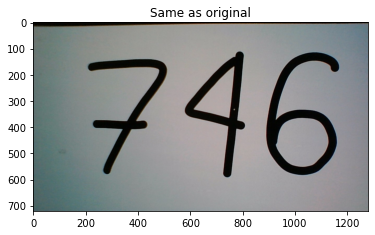

In [95]:
import cv2
from matplotlib import pyplot as plt

Foto = cv2.imread('Data_Testing6.jpg')
Foto = cv2.cvtColor(Foto,cv2.COLOR_BGR2RGB)

plt.imshow(Foto), plt.title('Same as original')

**Kedua, lakukan konversi warna gambar GRB menjadi Grayscale**

(<matplotlib.image.AxesImage at 0x20ff5bcb640>, Text(0.5, 1.0, 'Edit 1'))

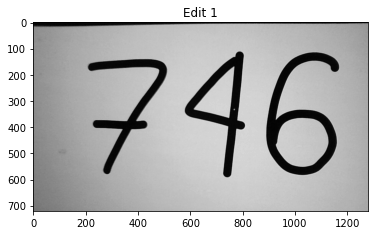

In [96]:
FotoEdit1 = cv2.cvtColor(Foto,cv2.COLOR_BGR2GRAY)

plt.imshow(FotoEdit1, cmap='gray'), plt.title('Edit 1')

**Ketiga, tambahkan GaussianBlur untuk mengurangi noise yang berukuran kecil**

(<matplotlib.image.AxesImage at 0x20ff5c39340>, Text(0.5, 1.0, 'Edit 2'))

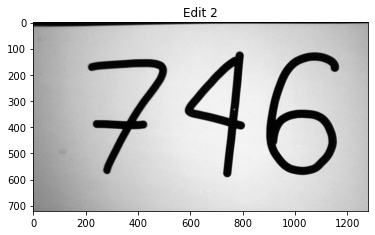

In [97]:
FotoEdit2 = cv2.GaussianBlur(FotoEdit1, (5, 5), 0)

plt.imshow(FotoEdit2, cmap='gray'), plt.title('Edit 2')

**Keempat, buat theshold agar proses pendeteksi objek semakin jelas**

(<matplotlib.image.AxesImage at 0x20ff5c9d490>, Text(0.5, 1.0, 'Edit 3'))

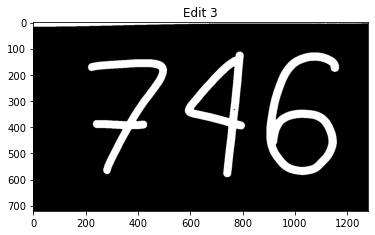

In [98]:
ret, img = cv2.threshold(FotoEdit2, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(img, cmap='gray'), plt.title('Edit 3')

**Kelima, Buat Perintah findContours untuk menggambar tepi luar objek yang terdeteksi**

(<matplotlib.image.AxesImage at 0x20ff5d10a60>, Text(0.5, 1.0, 'Edit 3'))

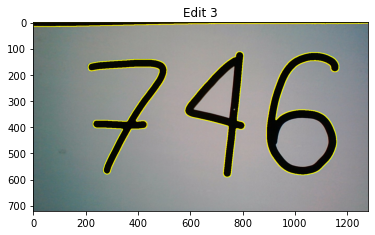

In [99]:
ctrs, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(Foto,ctrs,-1,(255,255,0),2)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

plt.imshow(Foto, cmap='gray'), plt.title('Edit 3')

**Terakhir, Memulai proses untuk mendeteksi angka**

1/1 [==============================] - 0s 19ms/step
Result: 2
1/1 [==============================] - 0s 18ms/step
Result: 6
1/1 [==============================] - 0s 18ms/step
Result: 4
1/1 [==============================] - 0s 19ms/step
Result: 6


(<matplotlib.image.AxesImage at 0x20ff6031ac0>, Text(0.5, 1.0, 'Result'))

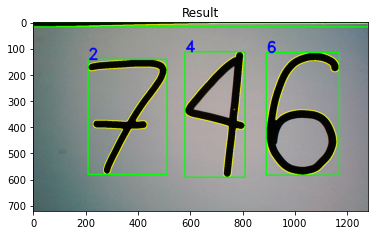

In [100]:
for rect in rects:
    x,y,w,h = rect
    if  h > 50 and h < 300  or w > 10 :
        #draw rectangel on image
        cv2.rectangle(Foto, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
        leng = int(rect[3] * 1.6)
        pt1 = abs(int(rect[1] + rect[3] // 2 - leng // 2))
        pt2 = abs(int(rect[0] + rect[2] // 2 - leng // 2))
        roi = img[pt1:pt1+leng, pt2:pt2+leng]
        roi = cv2.resize(roi,(28, 28), interpolation=cv2.INTER_AREA)
        #resize image
        roi = roi.reshape(-1,28, 28, 1)
        roi = np.array(roi, dtype='float32')
        roi /= 255
        pred_array = model.predict(roi)
        pred_array = np.argmax(pred_array)
        print('Result: {0}'.format(pred_array))
        cv2.putText(Foto, str(pred_array), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)

plt.imshow(Foto, cmap='gray'), plt.title('Result')

# Summary Step by Step

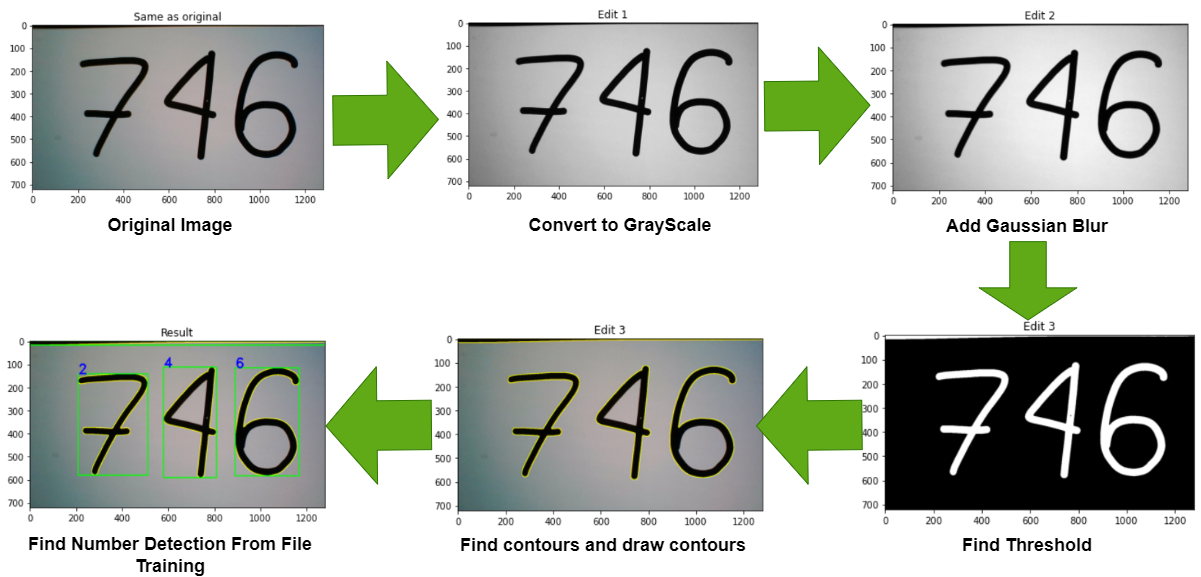

# Start Number Detection Realtime with Webcam

In [8]:
# import the opencv library
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, image = vid.read()
    
    #perform basic operation to smooth image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    
    #find threshold
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    #find contours and draw contours
    ctrs, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image,ctrs,-1,(255,255,0),2)
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    for rect in rects:
        x,y,w,h = rect
        if  h > 50 and h < 300  or w > 10 :
            #draw rectangel on image
            cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
            leng = int(rect[3] * 1.6)
            pt1 = abs(int(rect[1] + rect[3] // 2 - leng // 2))
            pt2 = abs(int(rect[0] + rect[2] // 2 - leng // 2))
            roi = img[pt1:pt1+leng, pt2:pt2+leng]
            roi = cv2.resize(roi,(28, 28), interpolation=cv2.INTER_AREA)
            #resize image
            roi = roi.reshape(-1,28, 28, 1)
            roi = np.array(roi, dtype='float32')
            roi /= 255
            pred_array = model.predict(roi)
            pred_array = np.argmax(pred_array)
            print('Result: {0}'.format(pred_array))
            cv2.putText(image, str(pred_array), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)
    #show frame
    cv2.imshow("Result",image)
  
    # Display the resulting frame
    cv2.imshow('frame', img)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 124ms/step
Result: 0
1/1 [==============================] - 0s 20ms/step
Result: 4
1/1 [==============================] - 0s 19ms/step
Result: 0
1/1 [==============================] - 0s 20ms/step
Result: 7
1/1 [==============================] - 0s 20ms/step
Result: 4
1/1 [==============================] - 0s 22ms/step
Result: 1
1/1 [==============================] - 0s 24ms/step
Result: 7
1/1 [==============================] - 0s 23ms/step
Result: 2
1/1 [==============================] - 0s 22ms/step
Result: 4
1/1 [==============================] - 0s 20ms/step
Result: 4
1/1 [==============================] - 0s 19ms/step
Result: 1
1/1 [==============================] - 0s 21ms/step
Result: 7
1/1 [==============================] - 0s 22ms/step
Result: 3
1/1 [==============================] - 0s 19ms/step
Result: 2
1/1 [==============================] - 0s 20ms/step
Result: 7
1/1 [==============================] - 0s 20ms/step
Result: 6
1/1 [==

1/1 [==============================] - 0s 21ms/step
Result: 8
1/1 [==============================] - 0s 21ms/step
Result: 3
1/1 [==============================] - 0s 20ms/step
Result: 2
1/1 [==============================] - 0s 20ms/step
Result: 8
1/1 [==============================] - 0s 20ms/step
Result: 7
1/1 [==============================] - 0s 19ms/step
Result: 2
1/1 [==============================] - 0s 20ms/step
Result: 7
1/1 [==============================] - 0s 20ms/step
Result: 0
1/1 [==============================] - 0s 20ms/step
Result: 2
1/1 [==============================] - 0s 20ms/step
Result: 5
1/1 [==============================] - 0s 19ms/step
Result: 4
1/1 [==============================] - 0s 20ms/step
Result: 3
1/1 [==============================] - 0s 21ms/step
Result: 0
1/1 [==============================] - 0s 20ms/step
Result: 7
1/1 [==============================] - 0s 21ms/step
Result: 7
1/1 [==============================] - 0s 20ms/step
Result: 8
1/1 [===

1/1 [==============================] - 0s 20ms/step
Result: 6
1/1 [==============================] - 0s 18ms/step
Result: 3
1/1 [==============================] - 0s 20ms/step
Result: 8
1/1 [==============================] - 0s 21ms/step
Result: 3
1/1 [==============================] - 0s 20ms/step
Result: 0
1/1 [==============================] - 0s 21ms/step
Result: 8
1/1 [==============================] - 0s 19ms/step
Result: 3
1/1 [==============================] - 0s 18ms/step
Result: 6
1/1 [==============================] - 0s 18ms/step
Result: 5
1/1 [==============================] - 0s 18ms/step
Result: 3
1/1 [==============================] - 0s 18ms/step
Result: 8
1/1 [==============================] - 0s 19ms/step
Result: 3
1/1 [==============================] - 0s 19ms/step
Result: 6
1/1 [==============================] - 0s 19ms/step
Result: 3
1/1 [==============================] - 0s 20ms/step
Result: 3
1/1 [==============================] - 0s 19ms/step
Result: 8
1/1 [===